In [1]:
#Data Preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv('company_profit_dataset.csv')

# Separate features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Encode 'State' using OneHotEncoding
categorical_cols = ['State']
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
#Model Training and Evaluation

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

linear_model = Pipeline(steps=[
    ('preprocessing', ct),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))

Linear Regression R2 Score: 0.8963652793995388
Linear Regression MSE: 109077692.67026815


In [3]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessing', ct),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2 Score: 0.8572040690438391
Random Forest MSE: 150295678.7180419


In [5]:
#XGBoostRegressor

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Manually transform features
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Evaluate
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost R2 Score: 0.8354316776710244
XGBoost MSE: 173211572.16669092


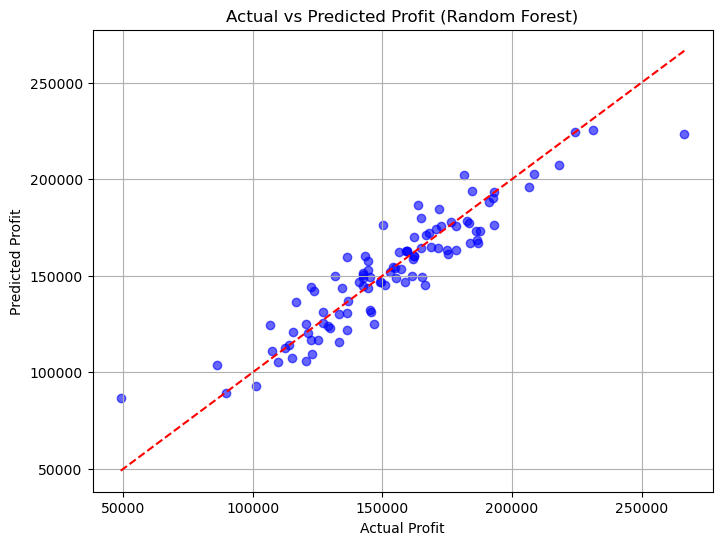

In [6]:
#Visualization

import matplotlib.pyplot as plt

# Example: Visualize Random Forest predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Random Forest)")
plt.grid(True)
plt.show()